# Filippo Conforto - RLab3

Some libraries are needed in order to store and plot the data.

In [5]:
library(tidyverse)
library(gridExtra)
library(grid)
library(ggplot2)
library(lattice)
library(latex2exp)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Exercise 1

The triangular distribution is described by the following expression:

\begin{equation}
  pdf(x) =
    \begin{cases}
      0 & x<a\\
      \frac{2(x-a)}{(b-a)(c-a)} & a<x<c\\
      \frac{2(b-x)}{(b-a)(b-c)} & c<x<b\\
      0 & x>b
    \end{cases}       
\end{equation}

As usual, the four functions associated to the probability distribution can be defined starting from the choosen interval (a,b) and the parameter c.
In particular the parameter c is defined as (a+b)/2 as default, and it corresponds to the distribution central value.

In [2]:
dtriang = function(x, a, b, c=(a+b)/2) {
    #Returns the pdf computed in x
    ifelse((x < c) & (x >= a), 2*(x-a)/((b-a)*(c-a)), ifelse((x <= b) & (x >= c), 2*(b-x)/((b-a)*(b-c)),0))
}

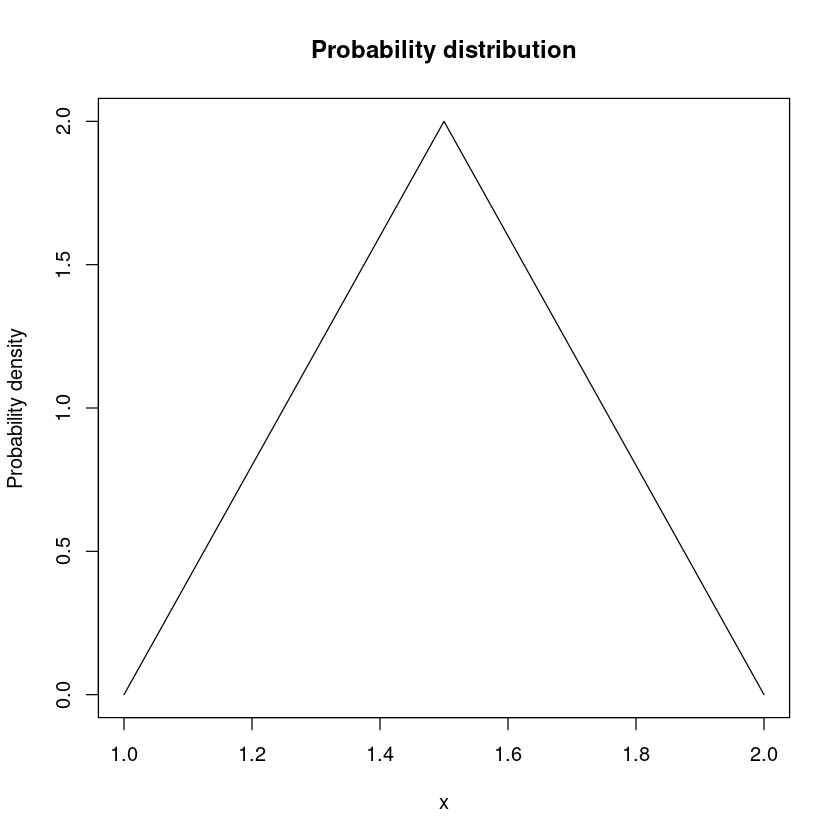

In [3]:
plot(seq(1,2,0.01),dtriang(seq(1,2,0.01),1,2), t= "l", main = "Probability distribution", xlab= "x", ylab ="Probability density")

The cumulative function is calculated as
\begin{equation}
  cdf(x) =
    \begin{cases}
      0 & x<a\\
      \int_a^x \frac{2(t-a)}{(b-a)(c-a)}dt = \frac{(x-a)^2}{(b-a)(c-a)}  & a<x<c\\
      \int_c^x \frac{2(b-t)}{(b-a)(b-c)}dt + \frac{(c-a)^2}{(b-a)(c-a)} = -\frac{(b-x)^2}{(b-a)(b-c)} +\frac{(b-c)^2}{(b-a)(b-c)} + \frac{(c-a)^2}{(b-a)(c-a)} & c<x<b\\
      1 & x>b
    \end{cases}       
\end{equation}

In [4]:
ptriang <- function (x, a,b, c=(a+b)/2) {
    # Returns the cdf computed in x
    k = (c-a)/(b-a)
    G = -(2*b*c -c^2)/((b-a)*(b-c)) + k
    return(ifelse((x < c) & (x >= a), ((x-a)^2)((b-a)*(c-a)), ifelse((x <= b) & (x >= c), (2*b*x-x^2)/((b-a)*(b-c))+G,0)))
}

In [5]:
qtriang <- function (p, a,b, c=(a+b)/2) {
    # Returns the quantile corresponding to the probability given
    k = (c-a)/(b-a)
    G = -(2*b*c -c^2)/((b-a)*(b-c)) + k
    return(ifelse(p < k , sqrt((b-a)*(c-a)*p)+a,b-sqrt(b^2+(b-a)*(b-c)*(G-p))))
}

In [6]:
rtriang <- function (n, a,b, c=(a+b)/2) {
    # Returns a set of simulated values, drawn from the distribution
    us = runif(n)
    k = (c-a)/(b-a)
    G = -(2*b*c -c^2)/((b-a)*(b-c)) + k
    return(ifelse(us < k , sqrt((b-a)*(c-a)*us)+a,b-sqrt(b^2+(b-a)*(b-c)*(G-us))))
}

Using the function rtriang previously defined, a set of $10^4$ simulated samples can be obtained. These values and the corresponding theoretical ones are stored in a single dataframe in order to simplify the plot.

In [7]:
data = data.frame(samp = rtriang(10000,1,2), plot = dtriang(seq(1,2,l=10000),1,2), x = seq(1,2,l=10000))

The theoretical distribution is plotted along with the simulated data distribution. In particular the histogram is normalized to 1 in order to better visualize the two figures.

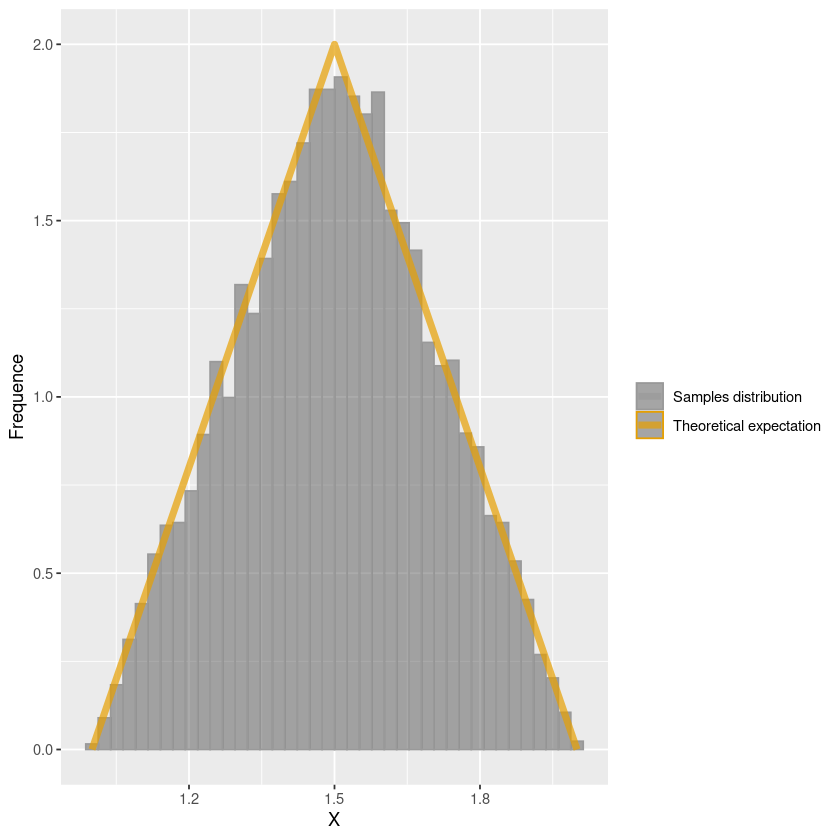

In [14]:
ggplot() + 
    geom_histogram(data = data, aes(x = samp, y=..density..,color = "Samples distribution"), alpha = 0.5, bins = 40) +
    geom_line(data = data, aes(x = x, y = plot, color = "Theoretical expectation" ), size = 2, alpha = 0.7) +
    labs( x="X", y= "Frequence", color = "") +
    scale_color_manual(values=c('#999999','#E69F00'))

## Exercise 2

The following function is used in order to simplify the computations.

In [6]:
G = function(f) {
    1-f
}

The results are obtainted using a serie of functions, args and a sequence of values for which the cdf are calculated using `invoke_map()`. Finally the cdf calculated are inverted using `G()` and `map()`.

In [7]:
funcs = list(pexp, punif, pbinom, ppois)
args = list( list(rate = 1),list(min=3,max=5),list(size=1,prob=1/2),list(lambda = 1/2))
results = invoke_map(funcs, args, seq(0,10,0.1))
results = map(results,G) 

Data is finally stored in a dataframe in order to plot them.

In [8]:
x = seq(0,10,0.1)
means= c(1,4,1/2,1)

In [9]:
data = data.frame( exp = results[[1]], unif = results[[2]], binom = results[[3]], pois = results[[4]], x=x)

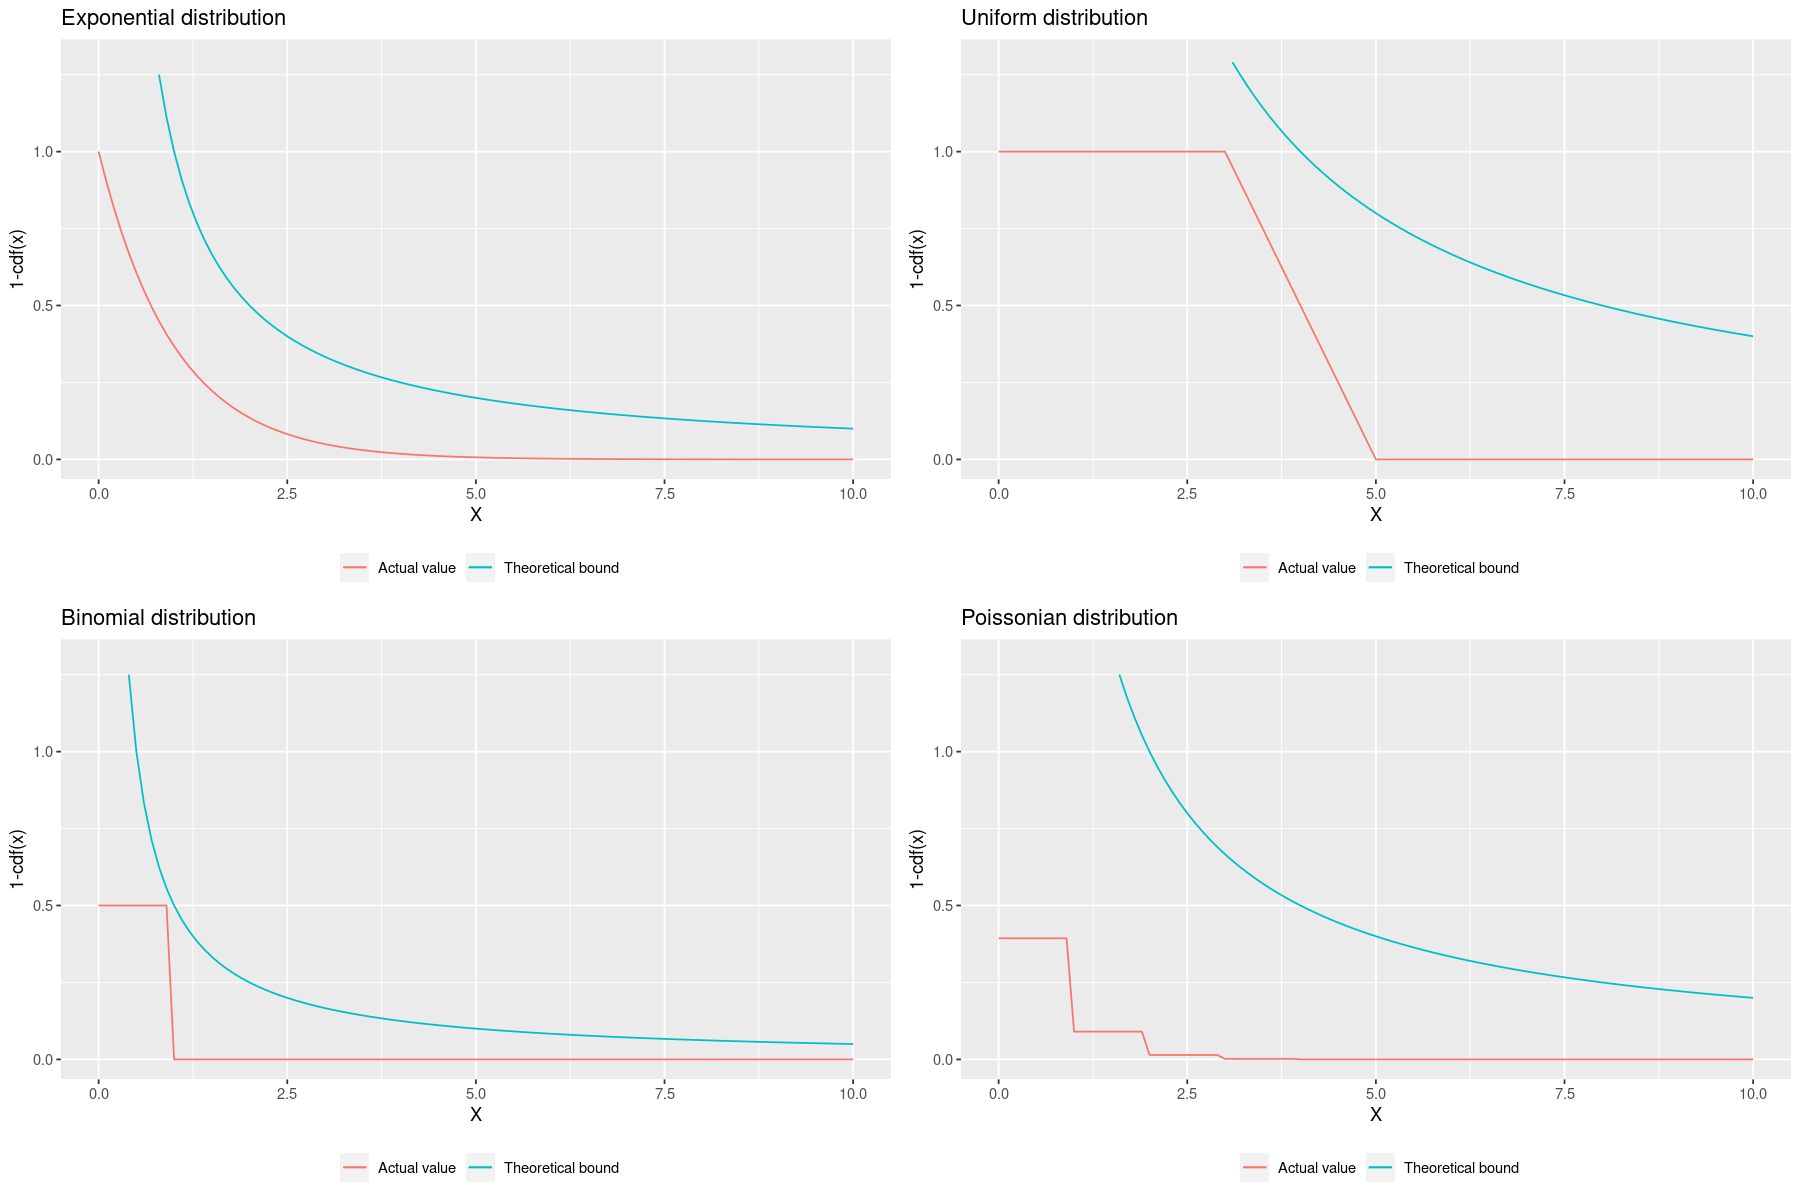

In [20]:
options(repr.plot.width=15, repr.plot.height=10)
p1=ggplot(data = data) + 
    geom_line(aes(x = x, y = exp, color = "Actual value")) +
    geom_line(aes(x = x, y = 1/x, color = "Theoretical bound")) +
    labs( x="X", y= "1-cdf(x)", color = "", title = "Exponential distribution")+
    ylim(0,1.3) + theme(legend.position="bottom")
p2 = ggplot(data = data) + 
    geom_line(aes(x = x, y = unif, color = "Actual value")) +
    geom_line(aes(x = x, y = 4/x, color ="Theoretical bound")) +
    labs( x="X", y= "1-cdf(x)", color = "", title = "Uniform distribution")+
    ylim(0,1.3) + theme(legend.position="bottom")
p3 = ggplot(data = data) + 
    geom_line(aes(x = x, y = binom, color = "Actual value")) +
    geom_line(aes(x = x, y = 0.5/x, color = "Theoretical bound")) +
    labs( x="X", y= "1-cdf(x)", color = "", title = "Binomial distribution")+
    ylim(0,1.3) + theme(legend.position="bottom")
p4 =ggplot(data = data) + 
    geom_line(aes(x = x, y = pois, color = "Actual value")) +
    geom_line(aes(x = x, y = 2/x, color = "Theoretical bound")) +
    labs( x="X", y= "1-cdf(x)", color = "", title = "Poissonian distribution") +
    ylim(0,1.3) + theme(legend.position="bottom")
grid.arrange(p1,p2,p3,p4,ncol=2,nrow=2)

The bound is respected as one should expect.

## Exercise 3

In order to test the Chebishev's inequality `intprob()` function is defined. This function allows to calculate the probability $$ P(|X- \mu| \geq k \sigma) = P(X \geq k \sigma + \mu) + P(X \leq \mu - k \sigma )$$

In [4]:
intprob = function(f,k, mean, var,args) {
    do.call(f,c(list(q=mean - k*sqrt(var) ), args)) + 1 - do.call(f,c(list(q=k*sqrt(var) + mean), args))
}

Using pmap and passing all cdf's argument, is possible to calculate the value of `intprob` for each distribution over k variation.

In [5]:
funcs = c(pnorm,pexp,punif, ppois)
args = list( list(mean = 3, sd=5),list(rate=1),list(min=1-sqrt(2), max = 1+sqrt(2)),list(lambda = 1/3))

res = list(f = funcs, k = list(seq(0,10,0.1),seq(0,10,0.1),seq(0,10,0.1),seq(0,10,0.1)), mean= c(3,1,1,1/3), var = c(25,1,2/3,1/3), args = args)  %>% pmap ( intprob )

In [87]:
x = seq(0,10,0.1)

data = data.frame( norm = res[[1]], exp = res[[2]], unif = res[[3]], pois = res[[4]], x=x)

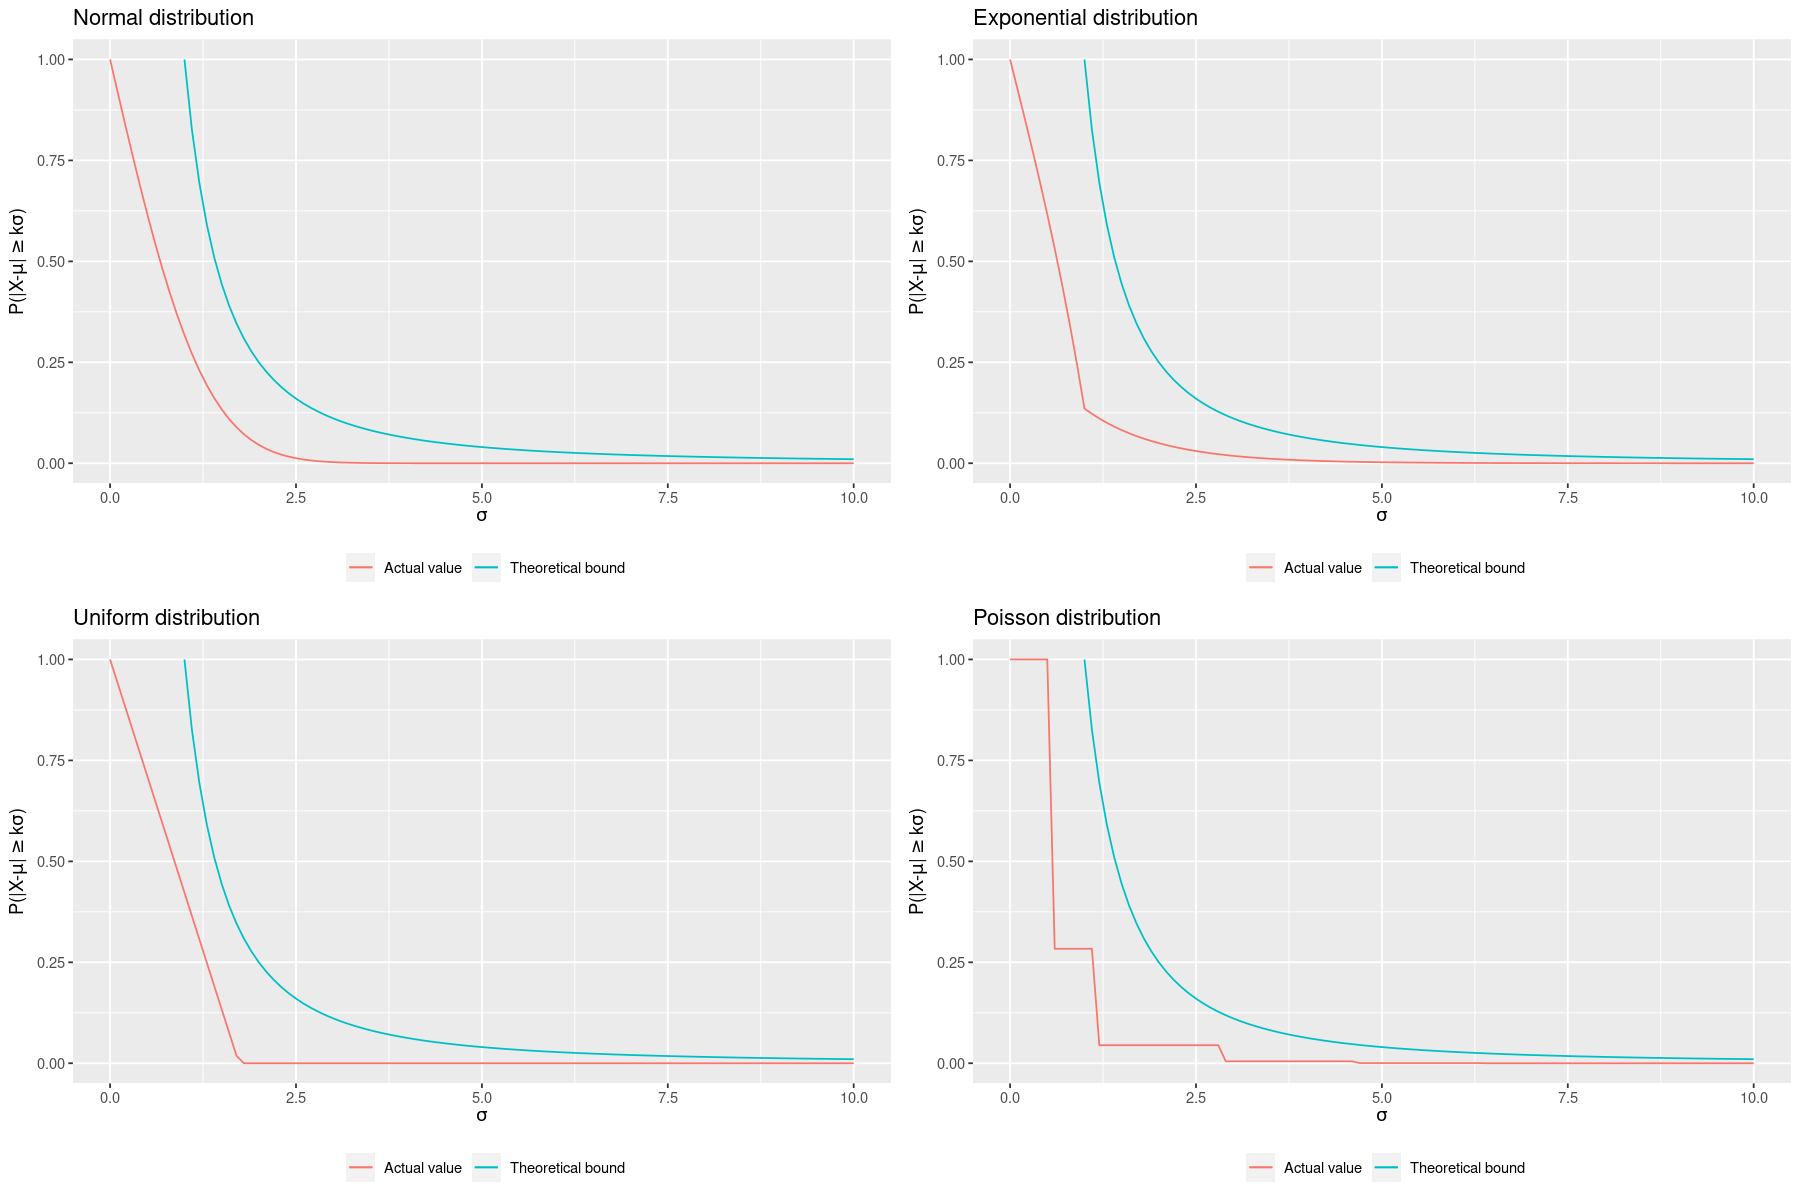

In [88]:
options(repr.plot.width=15, repr.plot.height=10)
p1=ggplot(data = data) + 
    geom_line(aes(x = x, y = norm, color = "Actual value")) +
    geom_line(aes(x = x, y = 1/x^2, color = "Theoretical bound")) +
    labs( x="k", y= TeX("$P(| X- \\mu |\\geq k \\sigma)$"), color = "", title = "Normal distribution")+
    ylim(0,1) + theme(legend.position="bottom")
p2 = ggplot(data = data) + 
    geom_line(aes(x = x, y = exp, color = "Actual value")) +
    geom_line(aes(x = x, y = 1/x^2, color = "Theoretical bound")) +
    labs( x="k", y= TeX("$P(| X- \\mu |\\geq k \\sigma)$"), color = "", title = "Exponential distribution")+
    ylim(0,1) + theme(legend.position="bottom")
p3 = ggplot(data = data) + 
    geom_line(aes(x = x, y = unif, color = "Actual value")) +
    geom_line(aes(x = x, y = 1/x^2, color = "Theoretical bound")) +
    labs( x="k", y= TeX("$P(| X- \\mu |\\geq k \\sigma)$"), color = "", title = "Uniform distribution")+
    ylim(0,1) + theme(legend.position="bottom")
p4 =ggplot(data = data) + 
    geom_line(aes(x = x, y = pois, color = "Actual value")) +
    geom_line(aes(x = x, y = 1/x^2, color = "Theoretical bound")) +
    labs( x="k", y= TeX("$P(| X- \\mu |\\geq k \\sigma)$"), color = "", title = "Poisson distribution") +
    ylim(0,1) + theme(legend.position="bottom")
grid.arrange(p1,p2,p3,p4,ncol=2,nrow=2)

Chebishev's inequality is respected.

## Exercise 4

In order to discuss data they are loaded using `map_df` over a list of names, that allows to read values for a certain number of countries and insert them into a single dataframe.

In [7]:
read_gdata <- function ( country, dir) {
filename <- paste0( "2020_", country , "_Region_Mobility_Report.csv")
filepath <- file.path(dir , filename )
read_csv (filepath)
}

After a selection has been chosen  `mutate` is used in order to simply representation for months and weeks. Since subregion data could be a problem for correct visualization, the corresponding rows are removed from the dataframe

In [8]:
country = c("IT","GB","DE")
dir="./Region_Mobility_Report_CSVs"
full_gdata  = map_df(country , read_gdata, dir)

# Mutate is used to transform dates into week specification
full_gdata = mutate(full_gdata, week = lubridate::week(date), month = lubridate::month(date))
# Check used to removed single region data
gdata = full_gdata[is.na(full_gdata$sub_region_1) ,]


── Column specification ────────────────────────────────────────────────────────
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_character(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  place_id = col_character(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_logical(

In [13]:
week_gdata = gdata %>% group_by(country_region, week) %>% summarise (ret_recr_mean = mean(retail_and_recreation_percent_change_from_baseline), 
                                                            shops_mean = mean(grocery_and_pharmacy_percent_change_from_baseline),
                                                            parks_mean = mean(parks_percent_change_from_baseline),
                                                            transit_mean = mean(transit_stations_percent_change_from_baseline),
                                                            work_mean = mean(workplaces_percent_change_from_baseline),
                                                            home_mean = mean(residential_percent_change_from_baseline)
                                                            )
month_gdata = gdata %>% group_by(country_region, month) %>% summarise (ret_recr_mean = mean(retail_and_recreation_percent_change_from_baseline),
                                                            shops_mean = mean(grocery_and_pharmacy_percent_change_from_baseline),
                                                            parks_mean = mean(parks_percent_change_from_baseline),
                                                            transit_mean = mean(transit_stations_percent_change_from_baseline),
                                                            work_mean = mean(workplaces_percent_change_from_baseline),
                                                            home_mean = mean(residential_percent_change_from_baseline),)

`summarise()` has grouped output by 'country_region'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'country_region'. You can override using the `.groups` argument.



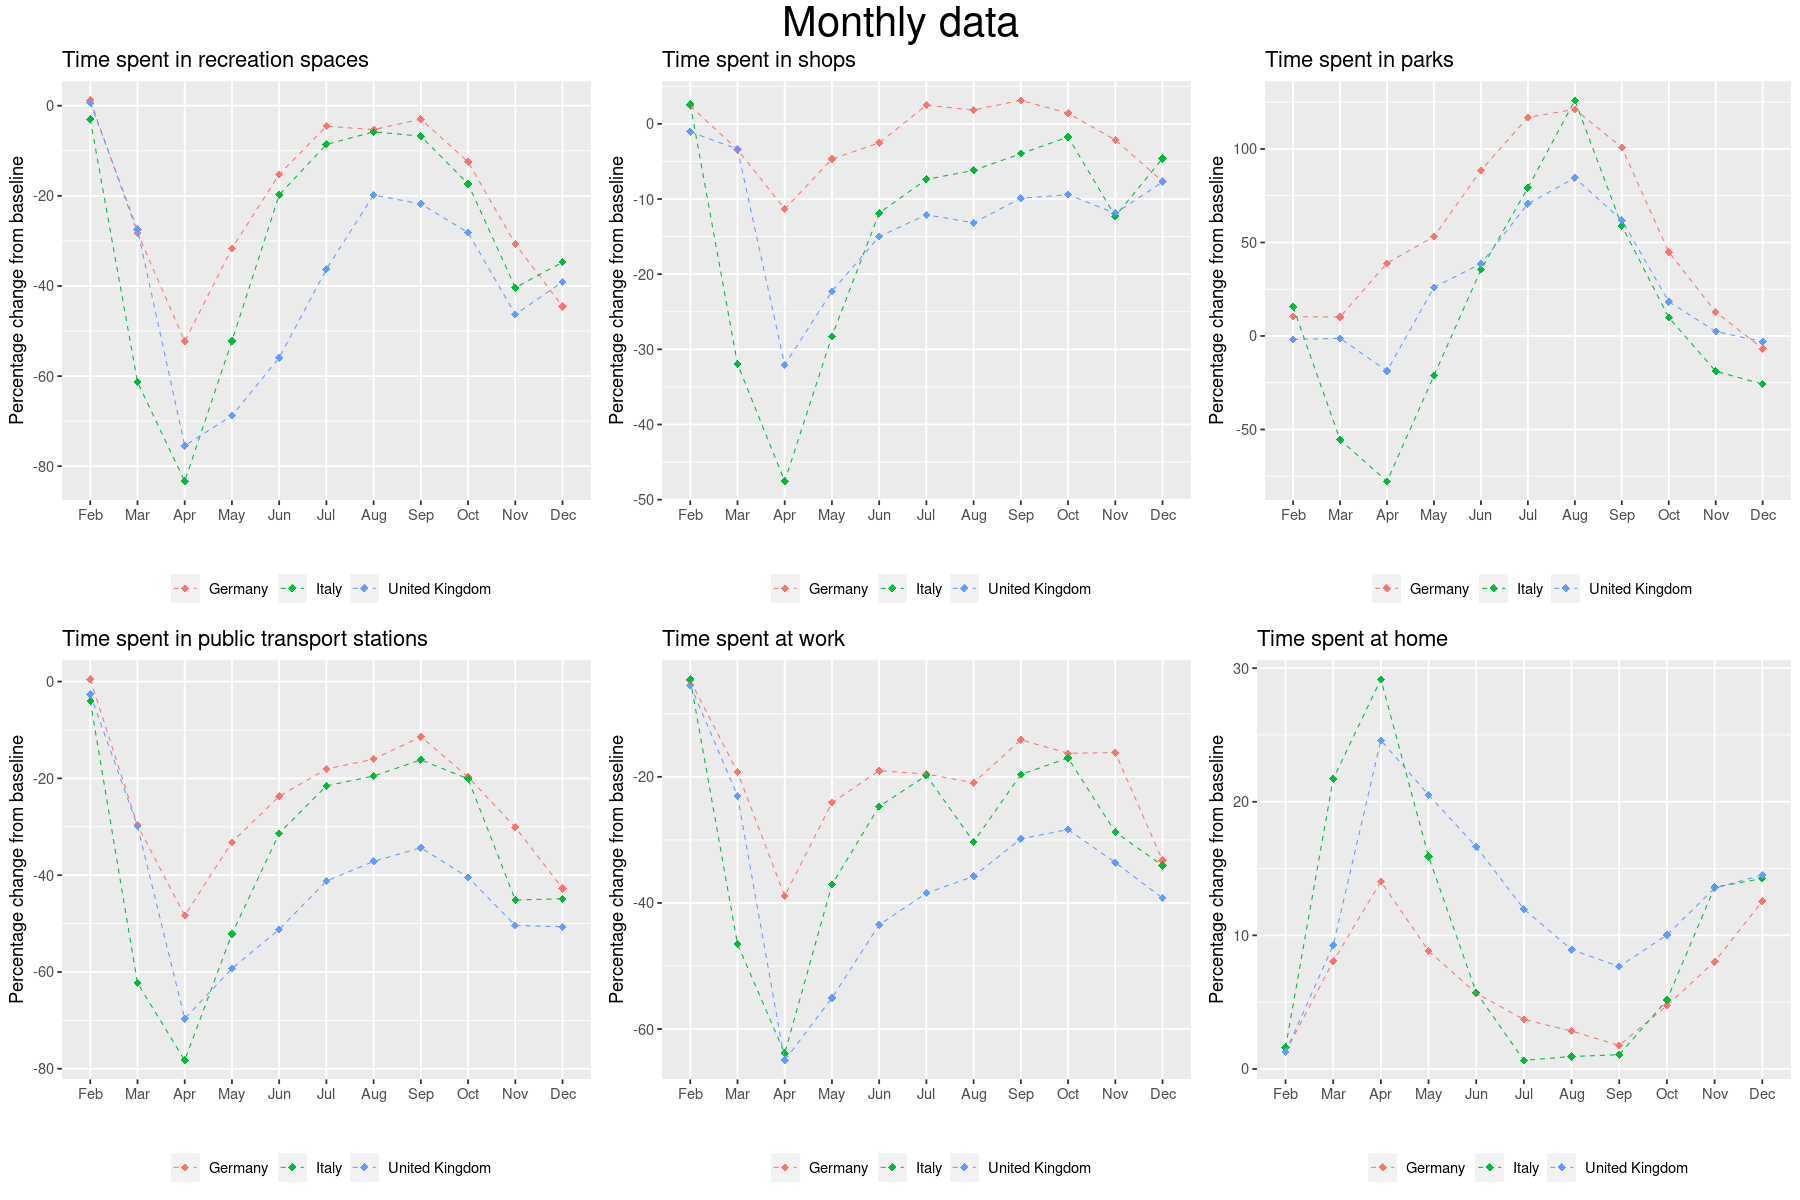

In [15]:
options(repr.plot.width=15, repr.plot.height=10)
p1=ggplot(data = month_gdata) + 
    geom_point(aes(x = lubridate::month(month_gdata$month, label = TRUE), y = ret_recr_mean, group = country_region,  color = country_region),shape=18, size =2) +
    geom_line(aes(x = lubridate::month(month_gdata$month, label = TRUE), y = ret_recr_mean, group = country_region,  color = country_region),linetype="dashed", size = 0.3) +
    labs( x="", y= "Percentage change from baseline", color = "", title = "Time spent in recreation spaces") +
    theme(legend.position="bottom") 
p2=ggplot(data = month_gdata) + 
    geom_point(aes(x = lubridate::month(month_gdata$month, label = TRUE), y = shops_mean, group = country_region,  color = country_region),shape=18, size =2) +
    geom_line(aes(x = lubridate::month(month_gdata$month, label = TRUE), y = shops_mean, group = country_region,  color = country_region),linetype="dashed", size = 0.3) +
    labs( x="", y= "Percentage change from baseline", color = "", title = "Time spent in shops")+
    theme(legend.position="bottom")
p3=ggplot(data = month_gdata) + 
    geom_point(aes(x = lubridate::month(month_gdata$month, label = TRUE), y = parks_mean, group = country_region,  color = country_region),shape=18, size =2) +
    geom_line(aes(x = lubridate::month(month_gdata$month, label = TRUE), y = parks_mean, group = country_region,  color = country_region),linetype="dashed", size = 0.3) +
    labs( x="", y= "Percentage change from baseline", color = "", title = "Time spent in parks")+
    theme(legend.position="bottom")
p4=ggplot(data = month_gdata) + 
    geom_point(aes(x = lubridate::month(month_gdata$month, label = TRUE), y = transit_mean, group = country_region,  color = country_region),shape=18, size =2) +
    geom_line(aes(x = lubridate::month(month_gdata$month, label = TRUE), y = transit_mean, group = country_region,  color = country_region),linetype="dashed", size = 0.3) +
    labs( x="", y= "Percentage change from baseline", color = "", title = "Time spent in public transport stations") +
    theme(legend.position="bottom")
p5=ggplot(data = month_gdata) + 
    geom_point(aes(x = lubridate::month(month_gdata$month, label = TRUE), y = work_mean, group = country_region,  color = country_region),shape=18, size =2) +
    geom_line(aes(x = lubridate::month(month_gdata$month, label = TRUE), y = work_mean, group = country_region,  color = country_region),linetype="dashed", size = 0.3) +
    labs( x="", y= "Percentage change from baseline", color = "", title = "Time spent at work") +
    theme(legend.position="bottom")
p6=ggplot(data = month_gdata) + 
    geom_point(aes(x = lubridate::month(month_gdata$month, label = TRUE), y = home_mean, group = country_region,  color = country_region),shape=18, size =2) +
    geom_line(aes(x = lubridate::month(month_gdata$month, label = TRUE), y = home_mean, group = country_region,  color = country_region),linetype="dashed", size = 0.3) +
    labs( x="", y= "Percentage change from baseline", color = "", title = "Time spent at home")+
    theme(legend.position="bottom")


grid.arrange(p1,p2,p3,p4,p5,p6,ncol=3,nrow=2, top = textGrob("Monthly data",gp=gpar(fontsize=25)))

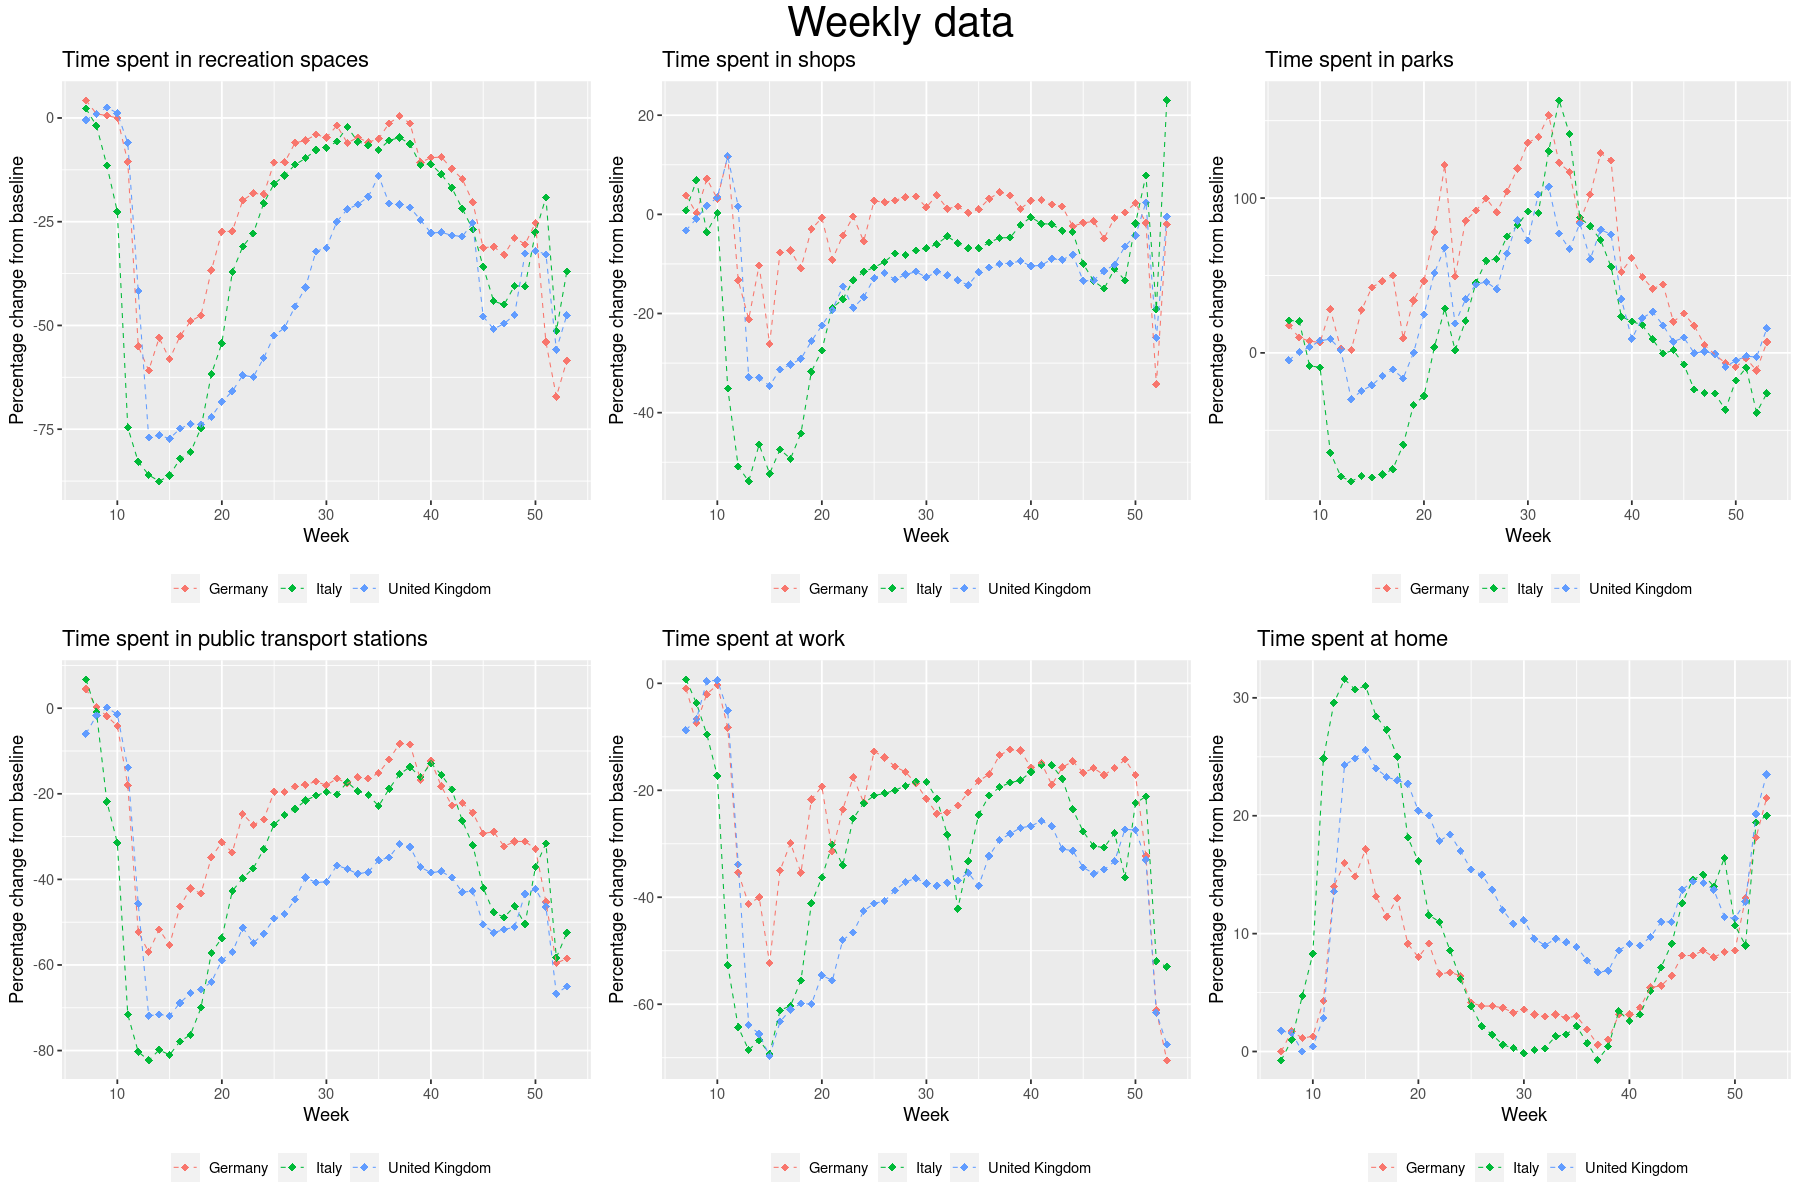

In [16]:
options(repr.plot.width=15, repr.plot.height=10)
p1=ggplot(data = week_gdata) + 
    geom_point(aes(x = week, y = ret_recr_mean, group = country_region,  color = country_region),shape=18, size =2) +
    geom_line(aes(x = week, y = ret_recr_mean, group = country_region,  color = country_region),linetype="dashed", size = 0.3) +
    labs( x="Week", y= "Percentage change from baseline", color = "", title = "Time spent in recreation spaces") +
    theme(legend.position="bottom")
p2=ggplot(data = week_gdata) + 
    geom_point(aes(x = week, y = shops_mean, group = country_region,  color = country_region),shape=18, size =2) +
    geom_line(aes(x = week, y = shops_mean, group = country_region,  color = country_region),linetype="dashed", size = 0.3) +
    labs( x="Week", y= "Percentage change from baseline", color = "", title = "Time spent in shops")+
    theme(legend.position="bottom")
p3=ggplot(data = week_gdata) + 
    geom_point(aes(x = week, y = parks_mean, group = country_region,  color = country_region),shape=18, size =2) +
    geom_line(aes(x = week, y = parks_mean, group = country_region,  color = country_region),linetype="dashed", size = 0.3) +
    labs( x="Week", y= "Percentage change from baseline", color = "", title = "Time spent in parks")+
    theme(legend.position="bottom")
p4=ggplot(data = week_gdata) + 
    geom_point(aes(x = week, y = transit_mean, group = country_region,  color = country_region),shape=18, size =2) +
    geom_line(aes(x = week, y = transit_mean, group = country_region,  color = country_region),linetype="dashed", size = 0.3) +
    labs( x="Week", y= "Percentage change from baseline", color = "", title = "Time spent in public transport stations") +
    theme(legend.position="bottom")
p5=ggplot(data = week_gdata) + 
    geom_point(aes(x = week, y = work_mean, group = country_region,  color = country_region),shape=18, size =2) +
    geom_line(aes(x = week, y = work_mean, group = country_region,  color = country_region),linetype="dashed", size = 0.3) +
    labs( x="Week", y= "Percentage change from baseline", color = "", title = "Time spent at work") +
    theme(legend.position="bottom")
p6=ggplot(data = week_gdata) + 
    geom_point(aes(x = week, y = home_mean, group = country_region,  color = country_region),shape=18, size =2) +
    geom_line(aes(x = week, y = home_mean, group = country_region,  color = country_region),linetype="dashed", size = 0.3) +
    labs( x="Week", y= "Percentage change from baseline", color = "", title = "Time spent at home")+
    theme(legend.position="bottom")

grid.arrange(p1,p2,p3,p4,p5,p6,ncol=3,nrow=2, top = textGrob("Weekly data",gp=gpar(fontsize=25)))

COVID-19 impact can be seen in each of these graphs. In particular the residential time increase and consequently the decrease for the other categories is evident for Italy ad UK. Germany seems to have avoided this kind of hard restrictions in the first lockdown.
In the following summer the overall state improved, and the curves seems to reach a new baseline, very similar to the old one, associated to the 0 percentage variation.

In the last period, with the pandemic spread, restriction increased, with the consequent variation for all activities time considered. This time even Germany could not avoid the problem, and his trend is pretty much similar to the other countries.